# Assignment 13 -> Build a H clustering Model to solve the problem

With the help of H clustering model to segment cars model based on specification data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [11]:
df = pd.read_csv("mtcars.csv")

In [12]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [13]:
df.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [14]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


# Data Preprocessing 

Normalilization is needed to bring data in to similiar scale

In [15]:
#dropping the unwanted column like car  name
cars = df.model

df.drop('model',axis =1, inplace = True )

In [16]:
#Normalization

from sklearn.preprocessing import normalize
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,0.107022,0.030578,0.815404,0.560590,0.019875,0.013352,0.083885,0.000000,0.005096,0.020385,0.020385
1,0.106994,0.030570,0.815190,0.560443,0.019870,0.014648,0.086716,0.000000,0.005095,0.020380,0.020380
2,0.156464,0.027450,0.741146,0.638209,0.026420,0.015921,0.127711,0.006862,0.006862,0.027450,0.006862
3,0.075866,0.021271,0.914648,0.389966,0.010919,0.011398,0.068918,0.003545,0.000000,0.010635,0.003545
4,0.046610,0.019940,0.897303,0.436189,0.007851,0.008574,0.042423,0.000000,0.000000,0.007478,0.004985


In [17]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


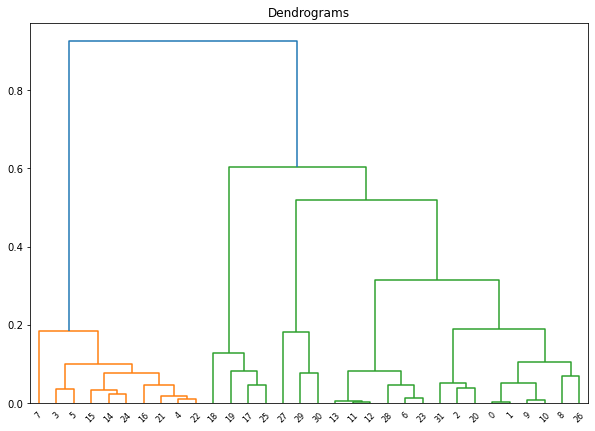

In [18]:
# Dendrogram to find the number of cluster 

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

From the Dendrogram we can identify the cluster no. as 4

In [29]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1,
       1, 0, 1, 2, 0, 3, 0, 3, 3, 0], dtype=int64)

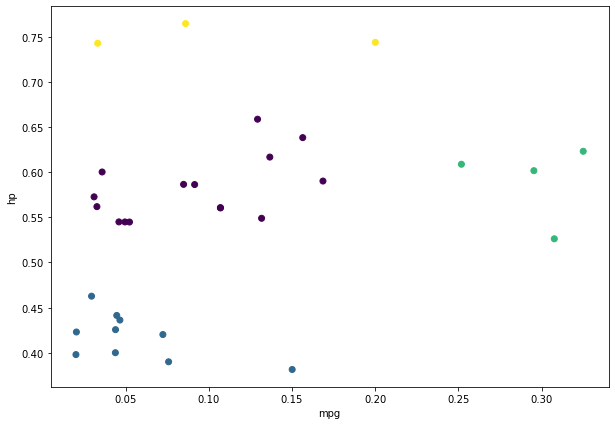

In [30]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['mpg'], data_scaled['hp'], c=cluster.labels_)
plt.xlabel('mpg')
plt.ylabel('hp')
plt.show()